<a href="https://colab.research.google.com/github/rsaeed15/Drug-Target-Interaction-/blob/main/PredictSolability_ML_Molecule_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Author: Rifat Saeed
# Molecules’ Solubility Prediction using GraphCon Model

In [32]:
!pip install DeepChem
!pip install rdkit-pypi
import deepchem as dc
from deepchem.models.graph_models import GraphConvModel
from rdkit import Chem
from rdkit.Chem import AllChem

In [5]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

In [6]:
train_dataset

<DiskDataset X.shape: (902,), y.shape: (902, 1), w.shape: (902, 1), ids: ['CC(C)=CCCC(C)=CC(=O)' 'CCCC=C' 'CCCCCCCCCCCCCC' ...
 'Nc2cccc3nc1ccccc1cc23 ' 'C1CCCCCC1' 'OC1CCCCCC1'], task_names: ['measured log solubility in mols per litre']>

In [72]:
# optimized values of dropout and epoch
model = GraphConvModel(n_tasks=1, mode='regression', dropout=0.20)
model.fit(train_dataset, nb_epoch=1000)
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_3/graph_pool_7/Reshape_14:0", shape=(341,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_3/graph_pool_7/Reshape_13:0", shape=(341, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_3/graph_pool_7/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_3/graph_pool_7/Reshape_17:0", shape=(1114,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_3/graph_pool_7/

In [71]:
print(model.evaluate(train_dataset, [metric], transformers))
print(model.evaluate(test_dataset, [metric], transformers))

{'pearson_r2_score': 0.9839474850881365}
{'pearson_r2_score': 0.762583372159109}


In [34]:
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceSidechains(m1,core)
m=Chem.MolToSmiles(tmp)

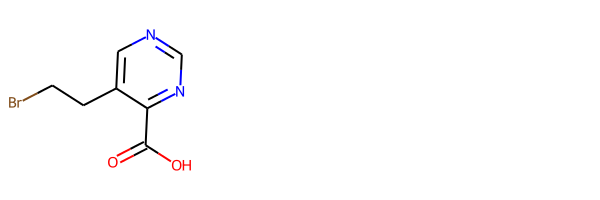

In [73]:
from rdkit.Chem import Draw
mol1 = [Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')]
image5=Draw.MolsToGridImage(mol1)
image5

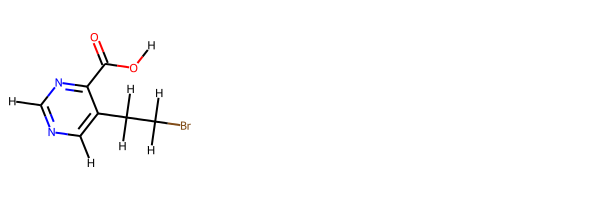

In [54]:
m=Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
m2 = Chem.AddHs(m)
mol2=[m2]
image6=Draw.MolsToGridImage(mol2)
image6

In [55]:
m2.GetNumAtoms()
m.GetNumAtoms() 

12

In [38]:
# Removing Cores
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceCore(m1,core)

In [40]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('[OH]')
rm = AllChem.DeleteSubstructs(m,patt)
Chem.MolToSmiles(rm)

'CC=O'

In [74]:
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(rm)
x

array([<deepchem.feat.mol_graphs.ConvMol object at 0x7ff32b5d5650>],
      dtype=object)

In [58]:
predict2=model.predict_on_batch(x)
predict2

array([[1.2802818]], dtype=float32)

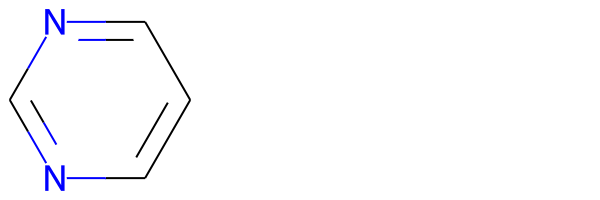

In [59]:
mol = [Chem.MolFromSmiles('c1cncnc1')]
image6=Draw.MolsToGridImage(mol)
image6

In [60]:
featurizer = dc.feat.ConvMolFeaturizer()
x1 = featurizer.featurize(mol)
predict1=model.predict_on_batch(x1)
predict1 

array([[2.2070358]], dtype=float32)

In [61]:
m=Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
m.GetNumAtoms()

12

In [62]:
patt = Chem.MolFromSmarts('[O]')
rm = AllChem.DeleteSubstructs(m,patt)
Chem.MolToSmiles(rm)

'Cc1ncncc1CCBr'

In [63]:
x = featurizer.featurize(rm)
predict=model.predict_on_batch(x)
predict  

array([[1.2802818]], dtype=float32)

In [64]:
m2 = Chem.AddHs(core)
m2.GetNumAtoms() 

10

In [65]:
x3 = featurizer.featurize(m2)
predict3=model.predict_on_batch(x3)
predict3

array([[0.00184587]], dtype=float32)

In [66]:
p = Chem.MolFromSmiles('[nH]1cnc2cncnc21')

In [67]:
x4 = featurizer.featurize(p)
predict4=model.predict_on_batch(x4)
predict4 

array([[1.7106996]], dtype=float32)

In [68]:
m = Chem.MolFromSmiles('CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1')
patt = Chem.MolFromSmarts('C(=O)[OH]')
rm2 = AllChem.DeleteSubstructs(m,patt)
rms=Chem.MolToSmiles(rm2)
rms2=Chem.MolFromSmiles(rms)

In [69]:
x5 = featurizer.featurize(m)
predict5=model.predict_on_batch(x5)
predict5 

array([[-0.5807855]], dtype=float32)